In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brain_df = pd.read_csv('datasets/headbrain.csv')
brain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X = brain_df['Head Size(cm^3)'].values
Y = brain_df['Brain Weight(grams)'].values

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape(len(X),1)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [5]:
help(train_test_split)


Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

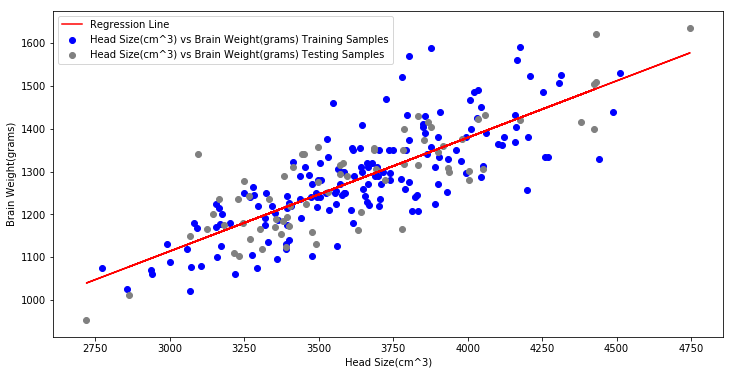

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X_train, Y_train)
# Y Prediction
Y_pred = reg.predict(X_test)

plt.figure(figsize=(12,6))
# Plotting scatter plot
plt.scatter(X_train,Y_train,label = 'Head Size(cm^3) vs Brain Weight(grams) Training Samples',color = 'b') 
# Plotting scatter plot
plt.scatter(X_test,Y_test,label = 'Head Size(cm^3) vs Brain Weight(grams) Testing Samples',color = 'grey',marker='o') 
plt.plot(X_test,Y_pred,'r',label='Regression Line') # Plotting the Regressing by using X and predicted values
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()


In [7]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Root mean Square Error (RMSE):",np.sqrt(mse))

Root mean Square Error (RMSE): 67.95527201634788


In [8]:
r2_score = reg.score(X_test, Y_test)
print("Coefficient of Determination R^2 Score:",r2_score)

Coefficient of Determination R^2 Score: 0.6993002108399291
